# Linear Regression
## 自作のトイデータで実験

In [40]:
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt

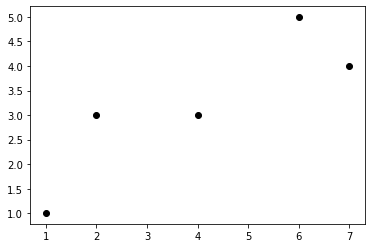

In [45]:
x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])
plt.scatter(x, y, color="k")
plt.show()

In [41]:
def solve_regression(xs :np.ndarray, ys :np.ndarray) -> Tuple[float, float]:
    '''
    Compute optimal parameter of linear function for given (xs, ys)

    Parameters
    ----------
    xs: np.ndarray:
        data list of input (scalar)
    ys: np.ndarray:
        data list of target (scalar)

    Returns
    -------
    w: float
        optimal w parameter of linear model (y = w*x + b)
    b: float
        optimal b parameter of linear model (y = w*x + b)
    '''

    n = len(x) # number of data
    w = ((np.dot(x, y) - y.sum() * x.sum() / n) /
         ((x**2).sum() - x.sum()**2 / n))
    b = (y.sum() - w * x.sum()) / n

    return w, b

In [53]:
w, b = solve_regression(x, y)
print(w, b)

27.914916220748115 49.872598263394906


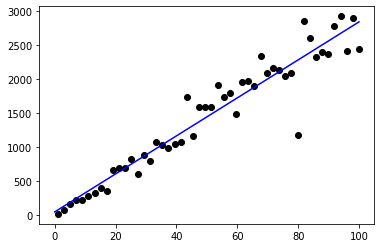

In [54]:
plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [b, w * xmax + b], color="b")
plt.show()

## 生成した擬似データで実験
x: 家の坪数, y: 家の価格　とした時の価格予想モデルを実装する

In [55]:
n = 50
x = np.linspace(1, 100, n)
y = x * 30 + np.random.randn(n)*(x*5)

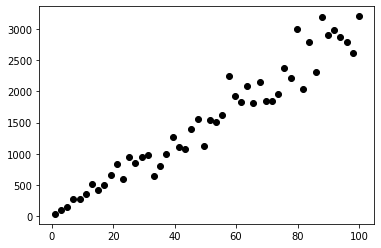

In [56]:
plt.scatter(x, y, color="k")

In [57]:
w, b = solve_regression(x, y)
print(w, b)

30.358532471942034 -11.670438664945541


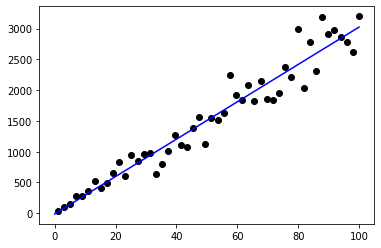

In [58]:
plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [b, w * xmax + b], color="b")
plt.show()

### 予測してみよう！


In [59]:
tsubo = 40
price = w * tsubo + b
print(price)

1202.6708602127358


## Scikit Learnを使ってみよう！
MLの代表的なモデルはimportするだけで使用することができ，様々な機能を備えていたり，高速な最適化が内部で行われていたりする

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
model.score(x.reshape(-1, 1), y)

0.9423527482518922

In [71]:
price = model.predict(np.array(tsubo).reshape(-1, 1))
print(price[0])

1202.670860212736
